In [61]:
!pip install seaborn


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. drinks.csv 파일 로드
2. 'beer_serving', 'spirit_serving', 'wine_serving', 'total_litree_of_pure_alcohol' 컬럼의 데이터 간의 상관관계 출력
3. 행렬 히트맵 시각화
4. 국가별 술 소비량 대비 알콜비율 컬럼 추가
5. 국가별 순위 시각화(우리나라의 소비량을 표시)

In [63]:
# 1. 파일 로드
drinks = pd.read_csv('../csv/drinks.csv')
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [64]:
## 상관계수 행렬 출력
corr = drinks[
    ['beer_servings',
     'spirit_servings',
     'wine_servings',
     'total_litres_of_pure_alcohol']
].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


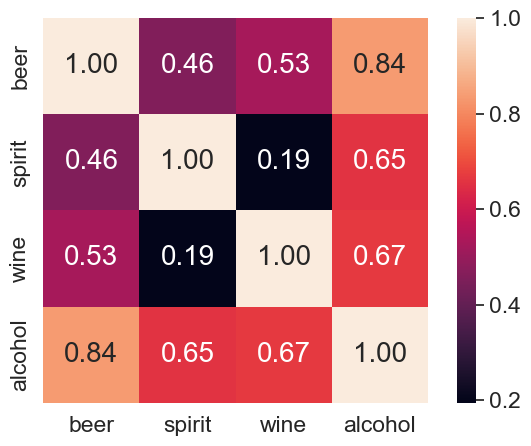

In [65]:
## 상관관계 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

sns.set(font_scale = 1.5)

hm = sns.heatmap(
    corr.values,
    cbar=True,
    annot = True,
    square = True,
    fmt = '.2f',
    annot_kws = {'size' : 20},
    xticklabels = cols_view,
    yticklabels = cols_view
)
plt.tight_layout()
plt.show()

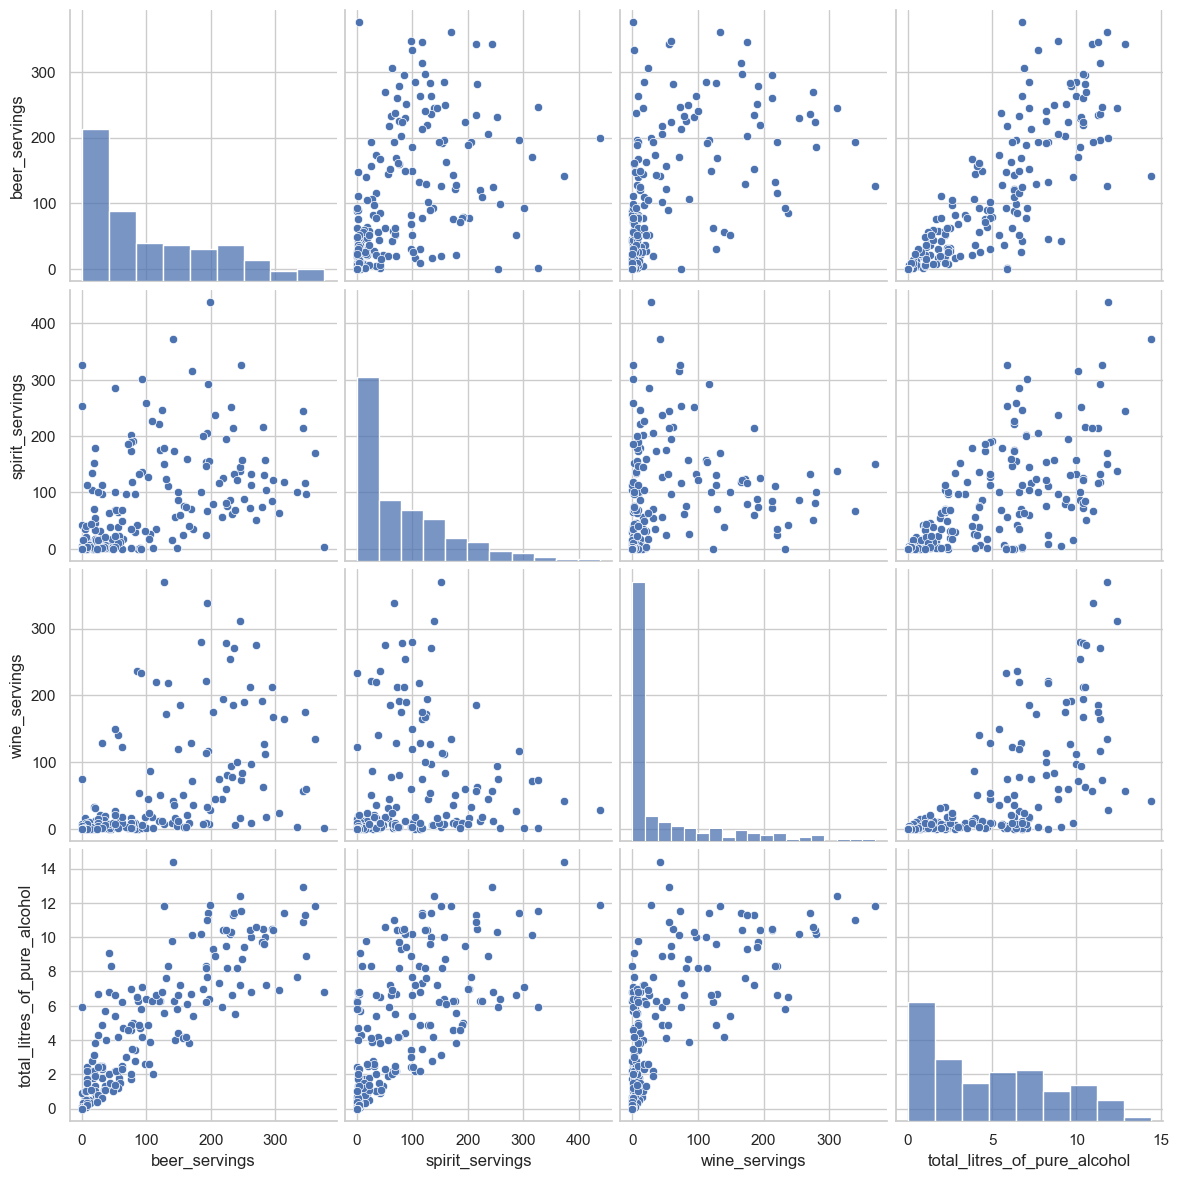

In [112]:
sns.set(style='whitegrid', context='notebook')

sns.pairplot(
    drinks[
        ['beer_servings',
         'spirit_servings',
         'wine_servings',
         'total_litres_of_pure_alcohol']
    ],
    height=3
)
plt.show()

In [67]:
## 새로운 파생변수를 생성
## 총 술의 소비량( total_servings ) = beer + spirit + wine

## 술 소비량 대비 알콜 비율 파생변수 생성
## alcohol_rate = total_litres_of_pure_alcohol / total_servings
## 결 측치 존재 -> 0으로대체
## South Korea 의 alcohol_rate 순위는 어떻게 되는가?

In [68]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']

In [69]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [70]:
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']

In [84]:
drinks['alcohol_rate'].isna().sum()

0

In [72]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
 6   total_servings                193 non-null    int64  
 7   alcohol_rate                  180 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.2+ KB


In [73]:
drinks[['alcohol_rate']].fillna(0)

,alcohol_rate
0,0.000000
1,0.017818
2,0.017949
3,0.017842
4,0.018495
...,...
188,0.017661
189,0.017544
190,0.016667
191,0.045455


In [74]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
 6   total_servings                193 non-null    int64  
 7   alcohol_rate                  180 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.2+ KB


In [75]:
drinks['alcohol_rate'].isna()

0       True
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: alcohol_rate, Length: 193, dtype: bool

In [76]:
drinks.head(16)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,0.017818
6,Argentina,193,25,221,8.3,SA,439,0.018907
7,Armenia,21,179,11,3.8,EU,211,0.018009
8,Australia,261,72,212,10.4,OC,545,0.019083
9,Austria,279,75,191,9.7,EU,545,0.017798


In [77]:
drinks = drinks.fillna(0)

In [78]:
drinks.head(16)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
5,Antigua & Barbuda,102,128,45,4.9,0,275,0.017818
6,Argentina,193,25,221,8.3,SA,439,0.018907
7,Armenia,21,179,11,3.8,EU,211,0.018009
8,Australia,261,72,212,10.4,OC,545,0.019083
9,Austria,279,75,191,9.7,EU,545,0.017798


In [79]:
drinks = drinks.sort_values(['alcohol_rate'],ascending=False)

In [80]:
drinks['country'].searchsorted('South Korea')

157

In [81]:
drinks.reset_index(drop=True, inplace=True)

In [82]:
drinks.head(16)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Gambia,8,0,1,2.4,AF,9,0.266667
1,Sierra Leone,25,3,2,6.7,AF,30,0.223333
2,Nigeria,42,5,2,9.1,AF,49,0.185714
3,Uganda,45,9,0,8.3,AF,54,0.153704
4,Rwanda,43,2,0,6.8,AF,45,0.151111
5,Tanzania,36,6,1,5.7,AF,43,0.132558
6,Burkina Faso,25,7,7,4.3,AF,39,0.110256
7,Central African Republic,17,2,1,1.8,AF,20,0.090000
8,Cote d'Ivoire,37,1,7,4.0,AF,45,0.088889
9,Mali,5,1,1,0.6,AF,7,0.085714


In [86]:
## South Korea 의 alcohol_rate 순위는 어떻게 되는가?
# alcohol_rate를 기준으로 내림차순 정렬을 해주겠다.
drinks_rank = drinks.sort_values('alcohol_rate', ascending=False)
# index를 초기화
drinks_rank = drinks_rank.reset_index(drop=True)

drinks_rank.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Gambia,8,0,1,2.4,AF,9,0.266667
1,Sierra Leone,25,3,2,6.7,AF,30,0.223333
2,Nigeria,42,5,2,9.1,AF,49,0.185714
3,Uganda,45,9,0,8.3,AF,54,0.153704
4,Rwanda,43,2,0,6.8,AF,45,0.151111
5,Tanzania,36,6,1,5.7,AF,43,0.132558
6,Burkina Faso,25,7,7,4.3,AF,39,0.110256
7,Central African Republic,17,2,1,1.8,AF,20,0.090000
8,Cote d'Ivoire,37,1,7,4.0,AF,45,0.088889
9,Mali,5,1,1,0.6,AF,7,0.085714


In [88]:
drinks_rank[drinks_rank['country'] =='South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,0.059394


In [89]:
drinks_rank.loc[drinks_rank['country'] =='South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,0.059394


In [91]:
drinks_rank.query("country == 'South Korea'")

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,0.059394


In [96]:
#  한국의 alcohol_rate 순위
drinks_rank[drinks_rank['country'] =='South Korea'].index + 1

Int64Index([15], dtype='int64')

0.0593939393939394


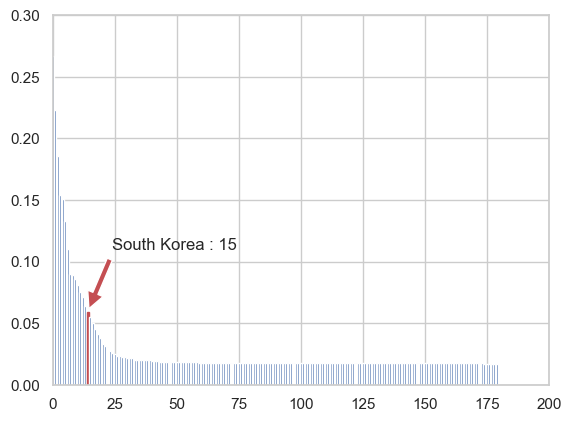

In [110]:
## 데이터의 시각화
x = drinks_rank.index
y = drinks_rank['alcohol_rate']

# 국가 리스트 만들기
country_list = drinks_rank['country'].tolist()

bar_list = plt.bar(x,y)

# 그래프 커스텀
bar_list[country_list.index('South Korea')].set_color('r')

# 그래프의 x축의 범위와 y축의 범위 지정        
plt.axis([0,200,0,0.3])                #axis(x축의 범위 시작,x축의범위 끝,y축의범위 시작,y축의 범위 끝)

korea_rank = country_list.index('South Korea') # + 1
korea_alcohol_rate = drinks_rank[drinks_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
print(korea_alcohol_rate)

plt.annotate(
    'South Korea : ' + str(korea_rank + 1),
    xy = (korea_rank, korea_alcohol_rate),
    xytext=(korea_rank + 10, korea_alcohol_rate + 0.05),
    arrowprops=dict(
        facecolor = 'r',
        shrink = 0.05
    )
)

plt.show()